2025-04-24 03:17:13.419527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745464633.692544      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745464633.768048      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Best number of trees: 200
R2 score: -0.05264493131955872
MSE: 35.7871686825


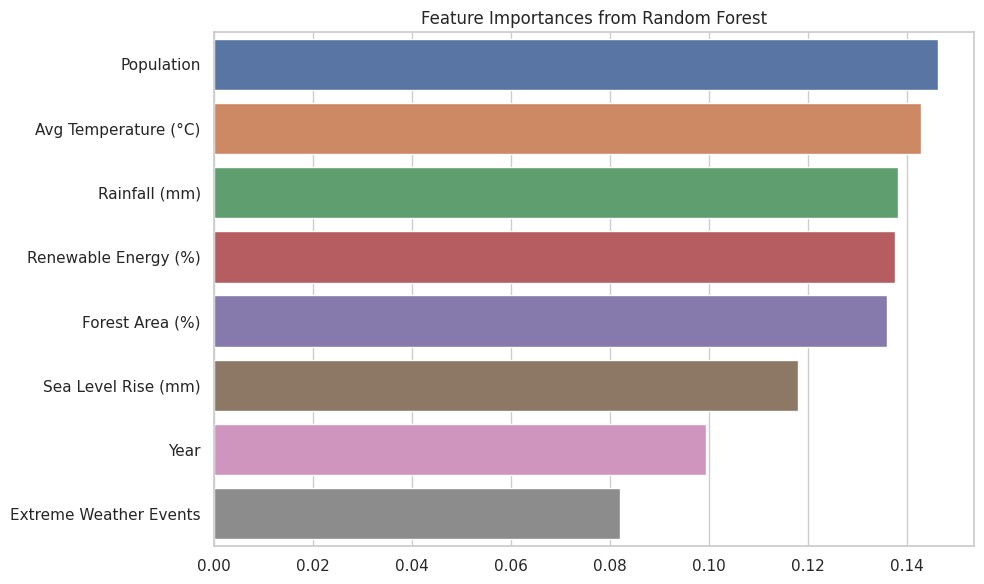

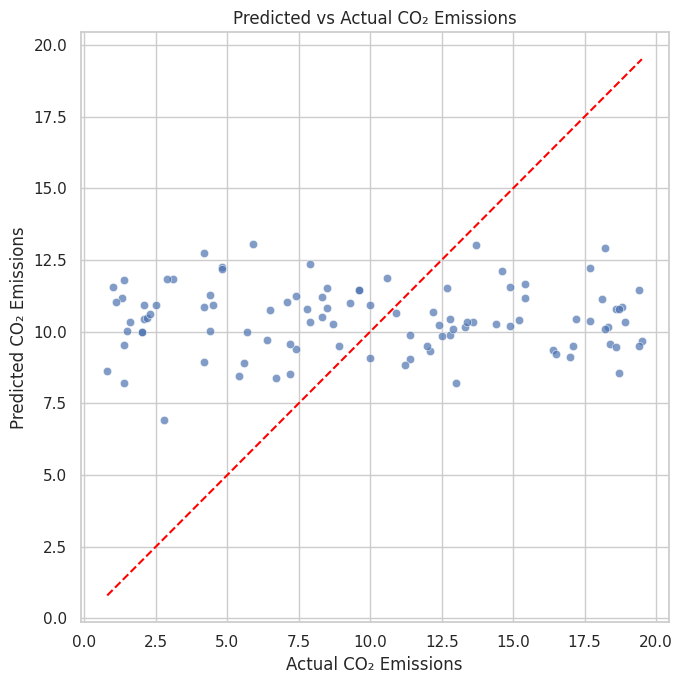

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


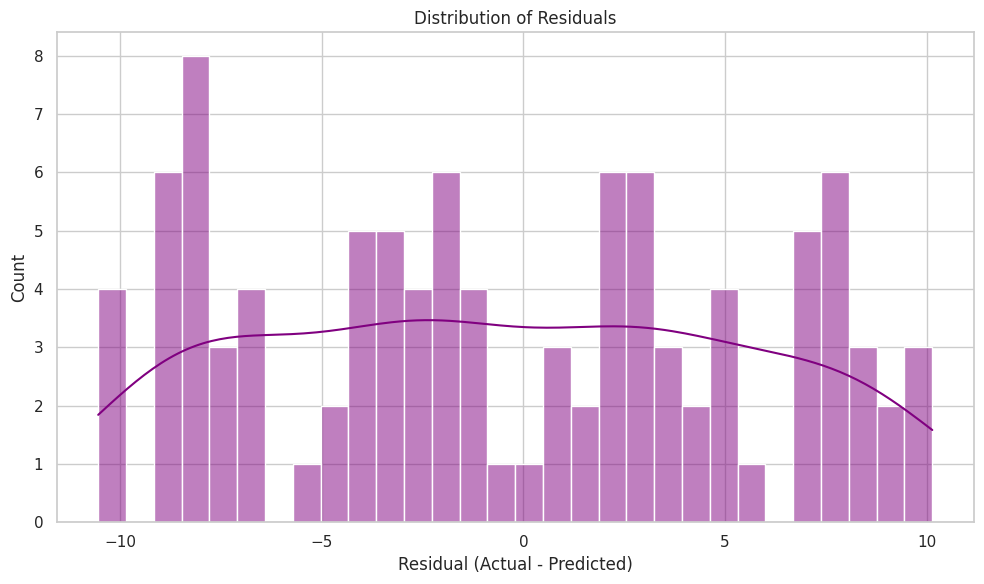

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# For cleaner plots
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv('/kaggle/input/climatechangedataset/climate_change_dataset.csv')
cols = list(df.columns)
cols[3], cols[9] = cols[9], cols[3]
df = df[cols]
df.drop(df.columns[1], axis=1, inplace=True)

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

# %% Hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200, 300]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best number of trees:", grid.best_params_['n_estimators'])

rf_model = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'], random_state=0)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

importances = rf_model.feature_importances_
feature_names = df.columns[:-1]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

# %% Plot: Predicted vs Actual
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Predicted vs Actual CO₂ Emissions")
plt.tight_layout()
plt.show()

# %% Plot: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()
